# Finger 1

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

plt.style.use('default') 
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid")

1) Analizar la distribución de postulaciones a avisos según la fecha, dia del mes, dia de la semana, etc. Algunas de las preguntas que podrían plantearse son: Se recibe un volumen de postulaciones similar cualquier dia de la semana? Existen variaciones según el mes del año, o aun dentro del mes? Etc.

In [75]:
postulaciones = pd.read_csv('data/fiuba_4_postulaciones.csv')
columns_rename = {'idaviso': 'id_aviso', 'idpostulante': 'idpostulante', 'fechapostulacion': 'fecha_postulacion'}
postulaciones = postulaciones.rename(columns=columns_rename)
postulaciones['fecha_postulacion']=pd.to_datetime(postulaciones['fecha_postulacion'])
postulaciones.head()

,id_aviso,idpostulante,fecha_postulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [17]:
#Chequeando si esta todo ok
postulaciones.isnull().any()

id_aviso             False
idpostulante         False
fecha_postulacion    False
dtype: bool

In [28]:
#Cuantos dias de postulaciones tenemos?
postulaciones['fecha_postulacion'].dt.date.value_counts().size

45

Distribución de postulaciones por dia de semana

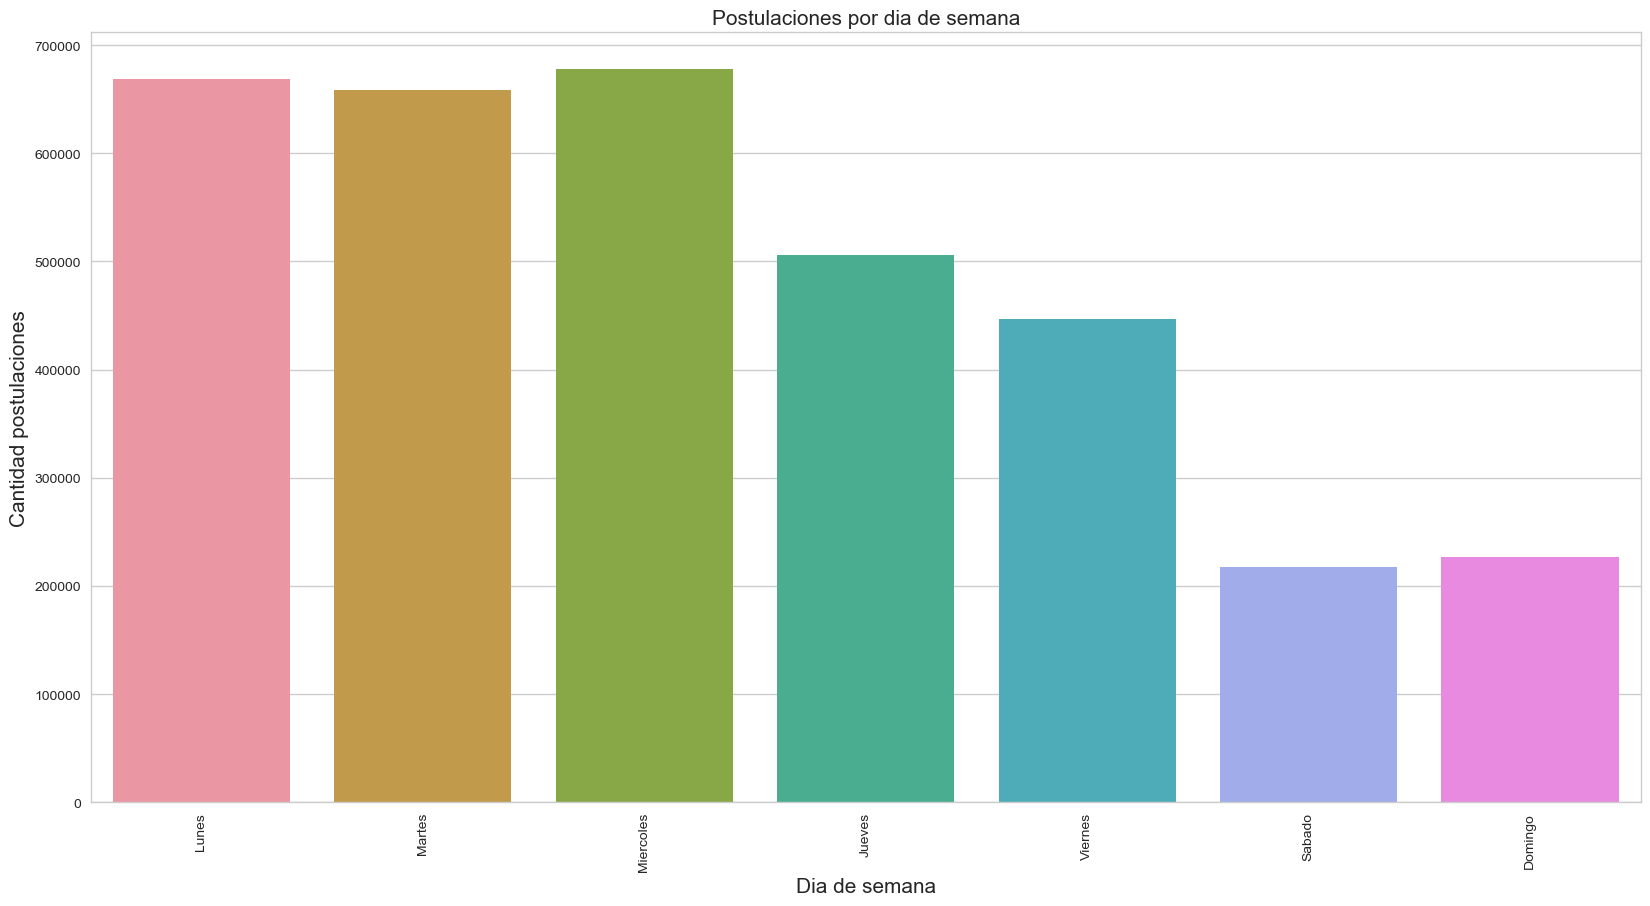

In [76]:
dayTranslation = {'Monday':'Lunes', 'Tuesday': 'Martes', 'Wednesday':'Miercoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'Sabado', 'Sunday':'Domingo'}
postulaciones['dia_semana'] = postulaciones['fecha_postulacion'].dt.weekday_name.map(lambda x: dayTranslation[x])
g = sns.countplot(x='dia_semana', data=postulaciones, order=list(dayTranslation.values()), orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dia de semana", fontsize=15)
g.set_ylabel("Cantidad postulaciones", fontsize=15)
g.set_title("Postulaciones por dia de semana", fontsize=15)

Vemos que los días Lunes, Martes y Miércoles son los dias en los que se realizan mayor cantidad de postulaciones.
Sábados y Domingos son los dias en que hay una menor cantidad de postulaciones.

Vamos a analizar la confiabilidad de los datos. Tenemos las postulaciones de 45 dias, queremos asegurarnos que
- No hay saltos de dias
- La cantidad de dias de la semana es pareja

Esto posiblemente no sume mucho en un informe, o deberia estar hecho fuera del informe.

In [ ]:
days = pd.Series(list(postulaciones['fecha_postulacion'].dt.date.value_counts().index))

In [52]:
pd.to_datetime(days).dt.weekday_name.value_counts()

Wednesday    7
Tuesday      7
Monday       7
Saturday     6
Sunday       6
Friday       6
Thursday     6
dtype: int64

In [53]:
pd.to_datetime(days).dt.year.value_counts()

2018    45
dtype: int64

In [54]:
pd.to_datetime(days).dt.month.value_counts()

2    28
1    17
dtype: int64

In [56]:
pd.to_datetime(days).dt.day.value_counts().sort_index()

1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    2
16    2
17    2
18    2
19    2
20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    1
30    1
31    1
dtype: int64

Los datos son desde el 15 de enero al 28 de Febrero del 2018. Tenemos 7 semanas de datos.

In [77]:
def get_week_label_for_january(day):
    if day<=20: return '01 - 3er sem ene'
    if day<=27: return '02 - 4ta sem ene'
    if day<=31: return '03 - 5ta sem ene'
    return '-'

def get_week_label_for_february(day):
    if day<=3: return '04 - 1er sem feb'
    if day<=10: return '05 - 2da sem feb'
    if day<=17: return '06 - 3er sem feb'
    if day<=24: return '07 - 4ta sem feb'
    if day<=28: return '08 - 5ta sem feb'
    return '-'

def get_week_label(date):
    if(date.month==1): return get_week_label_for_january(date.day)
    return get_week_label_for_february(date.day)

postulaciones['semana'] = postulaciones['fecha_postulacion'].map(get_week_label)

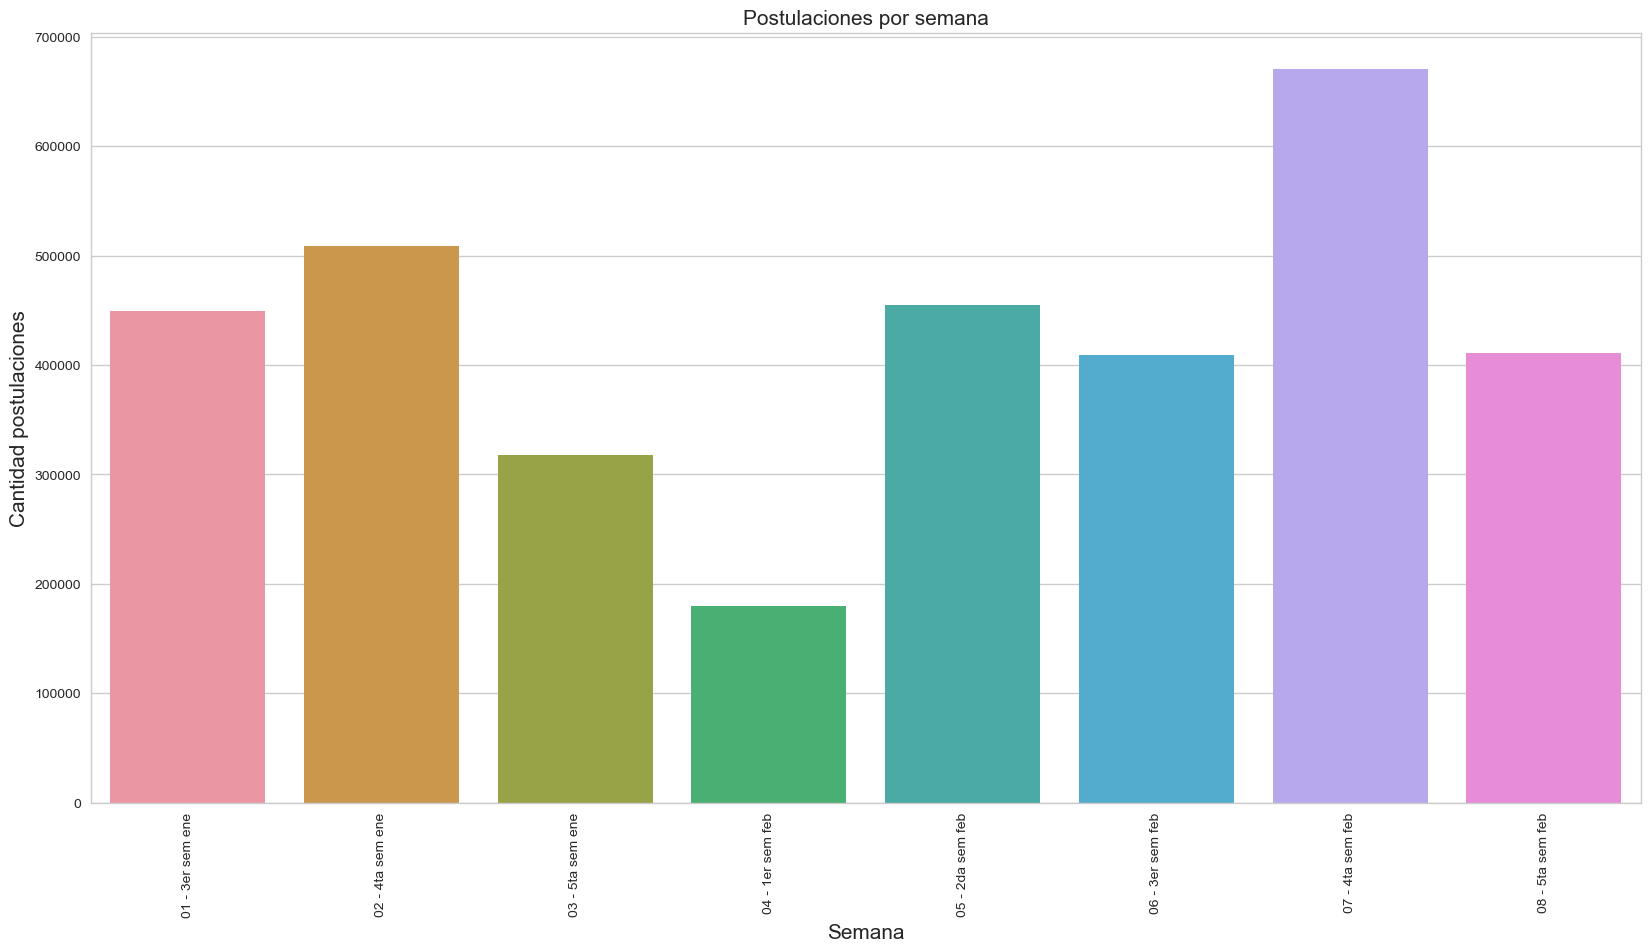

In [80]:
week_label_order = ['01 - 3er sem ene', '02 - 4ta sem ene', '03 - 5ta sem ene', '04 - 1er sem feb', '05 - 2da sem feb', '06 - 3er sem feb', '07 - 4ta sem feb', '08 - 5ta sem feb']
g = sns.countplot(x='semana', data=postulaciones, order=week_label_order, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Semana", fontsize=15)
g.set_ylabel("Cantidad postulaciones", fontsize=15)
g.set_title("Postulaciones por semana", fontsize=15)

La 4ta semana de Febrero es la más popular de todas las semanas, es el momento en que todavía no fin de mes.

In [78]:
for_heatmap = postulaciones.pivot_table(index='semana', columns='dia_semana', values='id_aviso', aggfunc='count')
for_heatmap = for_heatmap[['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado']]

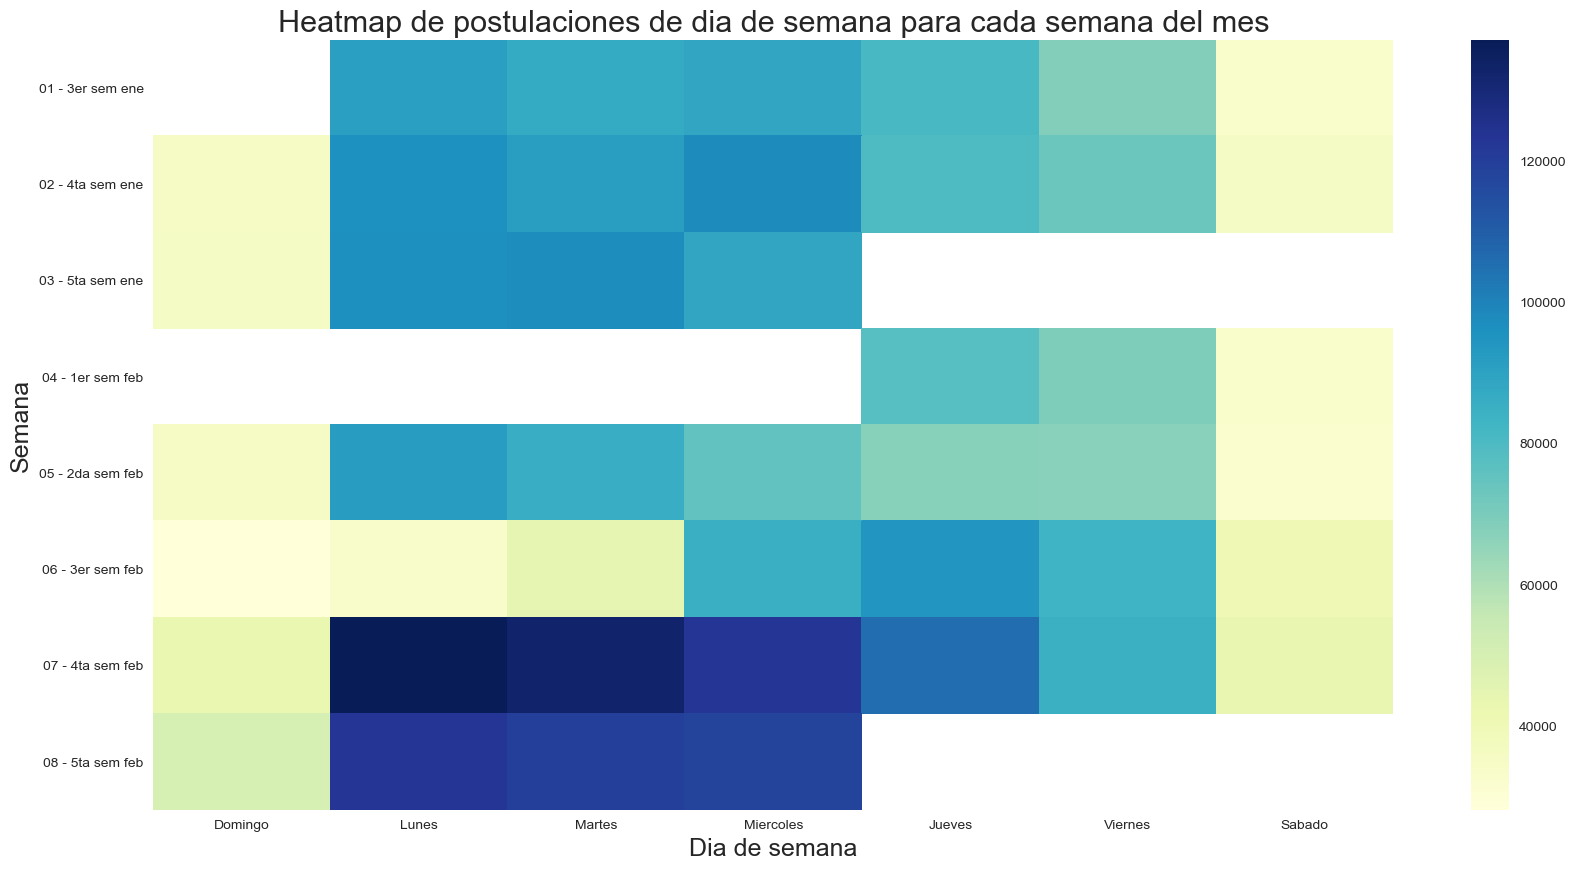

In [81]:
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Heatmap de postulaciones de dia de semana para cada semana del mes", fontsize=22)
g.set_xlabel("Dia de semana",fontsize=18)
g.set_ylabel("Semana", fontsize=18)